# Data Science Project: Planning Report
**Name:** Cohen Prescod (67109181)  
**Dataset:** players.csv 

In [9]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


In [10]:
players <- read_csv("project_data/players.csv")



players_summary <- players |>
  summarise(mean_age = round(mean(Age, na.rm = TRUE), 2), mean_hours = round(mean(played_hours, na.rm = TRUE), 2))

experience_stats <- players |>
    group_by(experience) |>
    summarise(count = n(), percent = round(100 * count / 196, 2))



players_summary
experience_stats

            

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_age,mean_hours
<dbl>,<dbl>
21.14,5.85


experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


# 1. Data Description

players.csv has 7 variable and 196 observations. Each observation represents one player, meaning our server has 196 unique players. This dataset can be used to understand the demographics of players on the server.

A character variable representing the player’s experience level (Beginner, Amateur, Regular, Veteran, and Pro). 
subscribe: A logical variable indicating newsletter subscription (TRUE or FALSE). 
hashedEmail: Character variable. A unique identifier for each player’s email address containing a series of lowercase letters and numbers. 
played_hours: A double variable showing the number of hours the player has logged on the server. Some players have 0 hours. 
name: A character variable containing each player’s first name.
gender: A character variable representing the player’s gender. This data was self-reported and some players chose not to answer. 
age: A double variable indicating each player’s age in years. Some entries are missing for this variable.


Some simple statistics can be found about the players from this dataset:

1. The average age of the players is **21.14** 
2. The average player has **5.85 hours** logged
3. The percent of players of each experience is:

   - **Beginner**: ***17.86%***
   - **Amateur**: ***32.14%***
   - **Regular**: ***18.37%***
   - **Veteran**: ***24.49 %***
   - **Pro**: ***7.14%***
     
   The average player either has no experience or very little on Minecraft.

# 2. Questions: 

 **Broad Question**:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**:
Can a player’s total hours played and age  predict their subscription status, and how does this relationship differ across categorical variables such as experience level and gender?

This analysis will use only the *players.csv* dataset. To predict the subscribe class, I will use **K-NN classification**. My predictors will be *age*, *hours_played*, *experience* and *gender*. This will allow me to explore which variables are most  associated with newsletter subscription.

# 3. Exploratory Data Analysis and Visualization

In [11]:
players <- read_csv("project_data/players.csv")


players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Tidy data must follow these rules:
- Each **Variable** forms a column
- Each **Observation** forms a row
- Each **Cell** is a single measurement

The data passes these rules. Every column has one variable, each row represents one player, and every cell contains one measurement. However, some of the rows have missing data in age. To make the data fully tidy I will remove any column where age is N/A

In [12]:
players <- players |>
    filter(!is.na(Age))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


The mean values for the numeric variables was found earlier when I found the simple statistics in the dataset:

In [13]:
players_summary <- players |>
  summarise(mean_age = round(mean(Age, na.rm = TRUE), 2), mean_hours = round(mean(played_hours, na.rm = TRUE), 2))

players_summary

mean_age,mean_hours
<dbl>,<dbl>
21.14,5.9


I will create a few vizualizations of our data to give a starting understanding of how different factors effect subscription

1. A bar graph showing proportion of subscriptions by different experience levels
2. A scatter plot of Age and Hours played, colored by subscription status



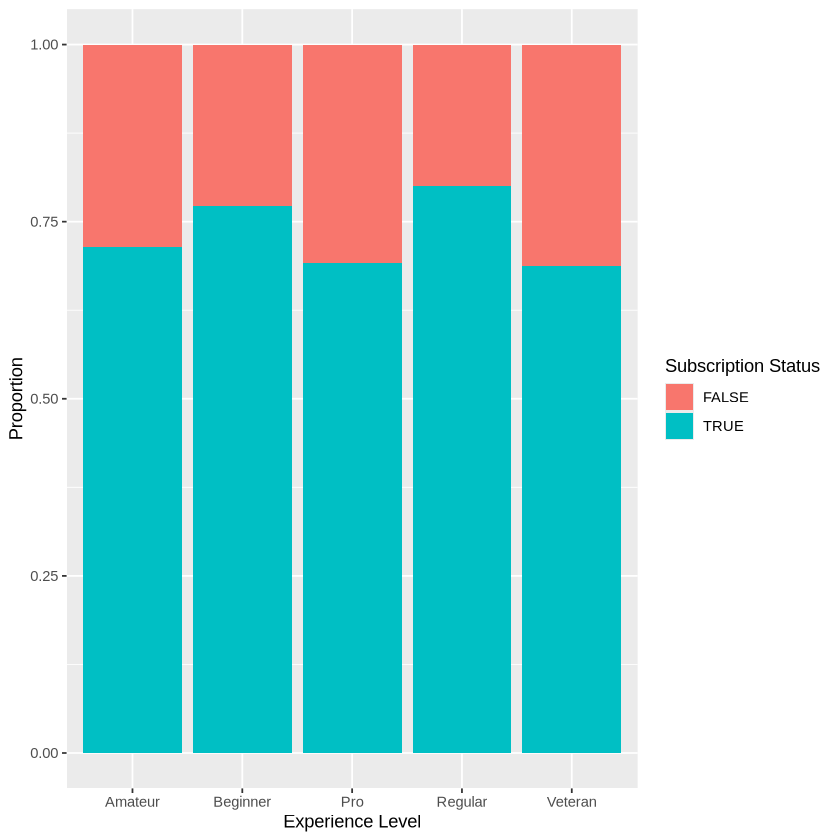

In [16]:
experience_bar <- ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Experience Level", y = "Proportion", fill = "Subscription Status")

experience_bar

This bar graph shows that although they do differ slightly, at all experience levels the percent of players subscribed stays  consistent, at around 75%. This means that **experience level won't be a good predictor**of if a player is subscribed or not.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


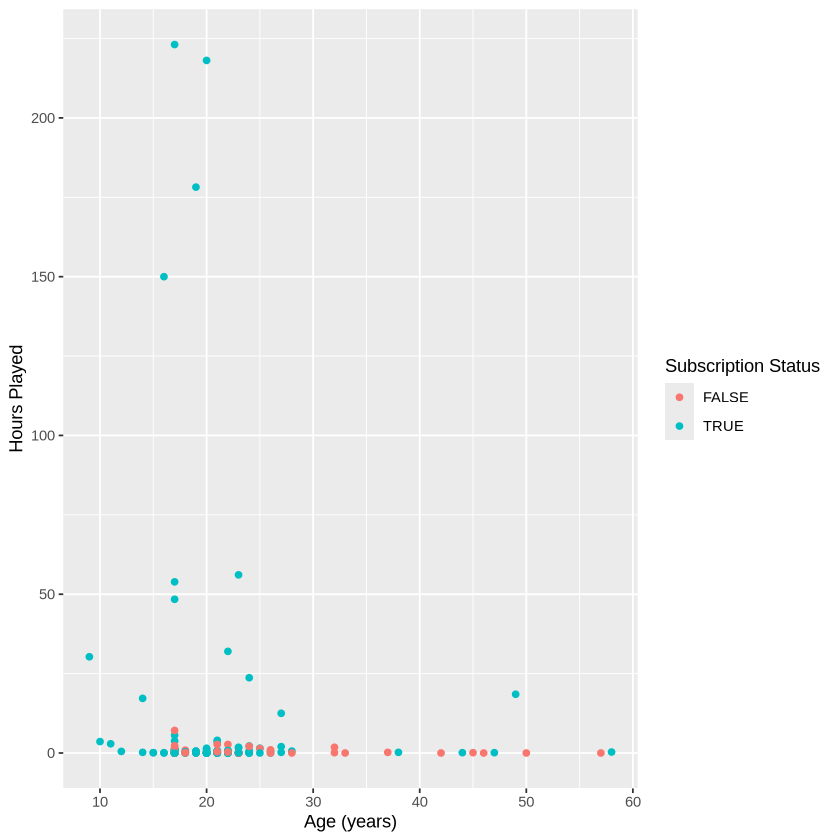

In [3]:
age_plot <- ggplot(players, aes(x = Age, y = played_hours, color = as.factor(subscribe))) +
    geom_point() + 
    labs(x = "Age (years)", y = "Hours Played", color = "Subscription Status")

age_plot

In [ ]:
2

# 4. Methods and Plan

To test whether age and playtime predict subscription, I will use a **KNN Classification model**.

I chose this method for a few reasons: KNN models are very good at categorizing things into a set of categories. Our data is also non-linear and KNN classification models are good at finding relationships even in non-linear data. KNN can also be used with both numeric and categorical predictors.

## Process

 ### 1. Data Preparation

- Convert the character predictor variables experience and gender into factors.

- Scale numerical predictors (age and played_hours) to standerdize distance.

 ### 2. Data Splitting

- Randomly split the dataset into 70% training and 30% testing sets.

 ### 3.  Model Tuning and Validation

 - Perform 5 fold cross-validation on the training data to determine the optimal K.

- Evaluate model performance using accuracy, precision, and recall on the test set.

 ### 4.  Variable Importance Exploration

- Repeat the modeling process using each predictor individually and combination of predictors to determine which variables contribute most to predicting subscription status.

- This will help identify which player characteristics are most informative and which can be excluded from the final predictive model.

The goal is to get an understanding of what variable are most useful in predicting subscription status.